In [ ]:
# import statements
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from math import sqrt
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt

In [ ]:
# Load data from CSV file
data = pd.read_csv('EJScreenNLifeExp_Col_Names.csv')

In [ ]:
# Remove unnecessary columns, empty rows, etc.
removed = data.drop(['ID', 'OID_', 'MINORPOP', 'LOWINCOME', 'UNEMPLOYED', 
                     'LINGISO', 'LESSHS', 'UNDER5', 'OVER64', 'PRE1960', 'LIFEEXPCT', 
                    'STATE_NAME', 'ST_ABBREV', 'CNTY_NAME', 'REGION'], axis=1)
df = removed.dropna()

RMSE value for k=  1 is: 3.633318904555836
RMSE value for k=  6 is: 2.828790471984675
RMSE value for k=  11 is: 2.7580369641055142
RMSE value for k=  16 is: 2.745879751424815
RMSE value for k=  21 is: 2.7394568602019165
RMSE value for k=  26 is: 2.736185620114307
RMSE value for k=  31 is: 2.7398458544004916
RMSE value for k=  36 is: 2.741686162285826
RMSE value for k=  41 is: 2.7443769023517195
RMSE value for k=  46 is: 2.7455843498851937
RMSE value for k=  51 is: 2.7475495704606123
RMSE value for k=  56 is: 2.749150842090304
RMSE value for k=  61 is: 2.752561979527312
RMSE value for k=  66 is: 2.755627028498786
RMSE value for k=  71 is: 2.7587204891418615
RMSE value for k=  76 is: 2.7602251783382155
RMSE value for k=  81 is: 2.7613585600907484
RMSE value for k=  86 is: 2.7638298410852786
RMSE value for k=  91 is: 2.7660071624535036
RMSE value for k=  96 is: 2.7695325847923167


<AxesSubplot:>

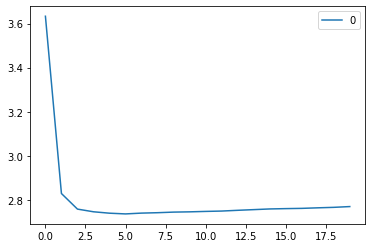

In [ ]:
# Split data into training and testing sets
scaler = MinMaxScaler()
X_train, X_test, y_train, y_test = train_test_split(scaler.fit_transform(df.drop('CalcLifeExpec', axis=1)), df['CalcLifeExpec'], test_size=0.2, random_state=42)

# Use this figure out what values of k to use for cross validation
rmse_val = [] #to store rmse values for different k
for K in range(0, 100, 5):
    K = K+1
    model = KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)
    
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

RMSE value for k=  2 is: 3.1633622324833577
RMSE value for k=  4 is: 2.9071767503725967
RMSE value for k=  6 is: 2.828790471984675
RMSE value for k=  8 is: 2.7908650521662004
RMSE value for k=  10 is: 2.7652130816100104
RMSE value for k=  12 is: 2.7530248264958597
RMSE value for k=  14 is: 2.7491219039474775
RMSE value for k=  16 is: 2.745879751424815
RMSE value for k=  18 is: 2.7411369713970872
RMSE value for k=  20 is: 2.7391927292304263
RMSE value for k=  22 is: 2.7385335537857123
RMSE value for k=  24 is: 2.739356776554082
RMSE value for k=  26 is: 2.736185620114307
RMSE value for k=  28 is: 2.73882941719962
RMSE value for k=  30 is: 2.7387693588396447
RMSE value for k=  32 is: 2.740247929950941
RMSE value for k=  34 is: 2.7397662758277357
RMSE value for k=  36 is: 2.741686162285826


<AxesSubplot:>

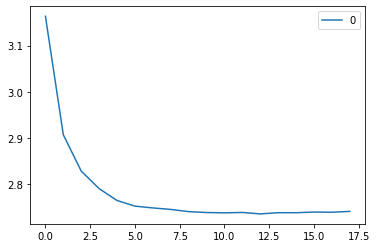

In [ ]:
# Use this figure out what values of k to use for cross validation
rmse_val = [] #to store rmse values for different k
for K in range(1, 36, 2):
    K = K+1
    model = KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)
    
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

RMSE value for k=  21 is: 2.7394568602019165
RMSE value for k=  22 is: 2.7385335537857123
RMSE value for k=  23 is: 2.7410684487946013
RMSE value for k=  24 is: 2.739356776554082
RMSE value for k=  25 is: 2.739251570117909
RMSE value for k=  26 is: 2.736185620114307
RMSE value for k=  27 is: 2.7364414801047285
RMSE value for k=  28 is: 2.73882941719962
RMSE value for k=  29 is: 2.7396721107803597
RMSE value for k=  30 is: 2.7387693588396447


<AxesSubplot:>

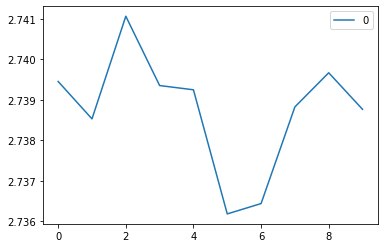

In [ ]:
# Use this figure out what values of k to use for cross validation
rmse_val = [] #to store rmse values for different k
for K in range(20, 30, 1):
    K = K+1
    model = KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)
    
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [ ]:
# Use the best value of k (which is k=26 based on the graphs above) to fit the model on the training data
best_knn = KNeighborsRegressor(n_neighbors=26)
best_knn.fit(X_train, y_train)

# Make predictions on the testing data using the best model
y_pred = best_knn.predict(X_test)

# Evaluate the model performance using mean squared error and r^2 score
mse_knn = mean_squared_error(y_test, y_pred)
r2_knn = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse_knn)
print("R^2 Score:", r2_knn)

Mean Squared Error: 7.486711747720313
R^2 Score: 0.5175936686240092


In [ ]:
# now, let's perform random forest regression as our second method of comparison

# Create Random Forest regression model with n_estimators=400 and fit it on the training data
X_train, X_test, y_train, y_test = train_test_split(df.drop('CalcLifeExpec', axis=1).values, df['CalcLifeExpec'], test_size=0.2, random_state=42)
rf = RandomForestRegressor(n_estimators=400, random_state=42, max_depth=7)
rf.fit(X_train, y_train)

# Determine the most important features using Random Forest
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
print("Feature importance, from greatest to least:")
for i in indices:
    print(df.columns[i])
n_top_features = 10 # set the number of top features to select
top_feature_indices = indices[:n_top_features]
X_train_top_features = X_train[:, top_feature_indices]

Feature importance, from greatest to least:
VULEOPCT
LINGISOPCT
LOWINCPCT
PRE1960PCT
LESSHSPCT
DSLPM
UST
PM25
UNEMPPCT
RESP
OVER64PCT
PTSDF
MINORPCT
ACSUNEMPBAS
ACSTOTPOP
ACSEDUCBAS
OZONE
ACSIPOVBAS
PWDIS
ACSTOTHU
PRMP
PTRAF
CANCER
ACSTOTHH
PNPL
UNDER5PCT


In [ ]:
# Fit a new Random Forest regression model on the selected top features
rf_top_features = RandomForestRegressor(n_estimators=400, random_state=42, max_depth=7)
rf_top_features.fit(X_train_top_features, y_train)

# Make predictions on the testing data using Random Forest regression with top features
X_test_top_features = X_test[:, top_feature_indices]
y_pred_rf = rf_top_features.predict(X_test_top_features)

# Evaluate the performance of Random Forest regression using mean squared error and r^2 score
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print("Random Forest Regression Mean Squared Error:", mse_rf)
print("Random Forest Regression R^2 Score:", r2_rf)

Random Forest Regression Mean Squared Error: 5.933695733877644
Random Forest Regression R^2 Score: 0.6176622679038108


In [ ]:
mse = 7.486711747720313 #from knn above, takes a long time to rerun so moved that number down here
# compare knn and random forest
if mse < mse_rf:
    print("KNN regression performs better than Random Forest regression.")
else:
    print("Random Forest regression performs better than KNN regression.")

Random Forest regression performs better than KNN regression.


In [ ]:
# Make predictions now, for both regression models

# KNN: 
X_new = np.array([[3497.000000, 3497.000000, 2486.000000, 1461.000000, 1823.000000, 965.000000, 0.217068, 
                   0.567915, 0.610523, 0.043523, 0.002053, 0.169751, 0.071776, 0.243923, 8.868041, 36.485385, 0.099896,
                   30.000000, 0.500000, 1.696800, 0.075699, 0.033103, 0.096154, 0.048505, 0.024388, 0.013224]])
X_new_norm = scaler.transform(X_new)
best_knn.fit(X_train, y_train)
y_pred = best_knn.predict(X_new_norm)
print(y_pred)

[78.43846154]


In [ ]:
# Random Forest - this is the model we are using. note that we are inputting 
# only the top 10 features now since feature selection was done on the random forest model
X_new = np.array([[0.217068, 0.002053, 0.610523, 0.013224, 0.024388, 3497.000000, 2486.000000, 
                   1461.000000, 1823.000000, 965.000000]])
rf_top_features.fit(X_train_top_features, y_train)
y_pred = rf_top_features.predict(X_new)
print(y_pred)

[74.72236968]


In [ ]:
#Save the random forest model w/ feature selection to be used in the visualization

top_features = df.columns[top_feature_indices]
import pickle
filename = 'rf_model.pkl'
with open (filename, 'wb') as file:
    pickle.dump((rf_top_features, top_features), file)